In [51]:
import pandas as pd
import numpy as np
from collections import defaultdict
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from gol_functions import (generate_rand_matrix,matrix_data_collection,get_neighbors,next_gen,run_game,sample_runs)

In [8]:
def cohens_f(f_stat, df_groups, df_obs):
    import numpy as np
    eta_squared = (f_stat * df_groups) / (f_stat * df_groups + df_obs)
    cohens_f = np.sqrt(eta_squared / (1 - eta_squared))
    return cohens_f

In [ ]:
def get_matrix_size_summary_stat(df):
    results = {}
    for 

In [181]:
def anova_analysis(df):
    import scipy.stats as stats
    import pandas as pd
    import seaborn as sns
    import numpy as np
    anova_results =[]
    summary_df = df.groupby(["matrix_size","initial_percent_alive","run"],as_index=False)["gen"].max()
    for size in summary_df["matrix_size"].unique():
        size_df = summary_df[summary_df["matrix_size"]==size]
        percent_alive_grouped_df = size_df.groupby(["initial_percent_alive","run"],as_index=False)["gen"].max()
        grouped_lists = percent_alive_grouped_df.groupby("initial_percent_alive")["gen"].apply(list)
        f_stat, p_value = stats.f_oneway(*grouped_lists)
        
        degree_of_freedom_groups = len(grouped_lists)-1
        degree_of_freedom_observations = size_df.shape[0] - len(grouped_lists)
        con_f = cohens_f(f_stat,degree_of_freedom_groups,degree_of_freedom_observations)
        anova_results.append({
            "matrix_size": size,
            "f_stat": f_stat,
            "p_value": p_value,
            "cohen_f":con_f
        })
    result_df = pd.DataFrame(anova_results)
    return result_df

def determine_sample_size(df):
    from statsmodels.stats.power import FTestAnovaPower
    import math
    sample_size_dict = {}
    for _,r in df.iterrows():
        effect = float(r["cohen_f"])
        if effect>=1:
            effect=.98
        power_analysis = FTestAnovaPower()
        z= power_analysis.solve_power(effect_size=effect, alpha=.05, power=.9, k_groups=19)
        sample_size_dict[int(r["matrix_size"])]=  (math.ceil(z))+1


In [ ]:
sample_output = sample_runs(11)

In [92]:
sample_output["id"] = sample_output[["run","initial_percent_alive","matrix_size"]].astype(str).agg("-".join,axis=1)

In [101]:
end_state_count=pd.DataFrame(sample_output.drop_duplicates(subset="id")["term_reason"].value_counts()).reset_index(drop=False)

Text(0.5, 1.0, 'End Result of Game by Percentage')

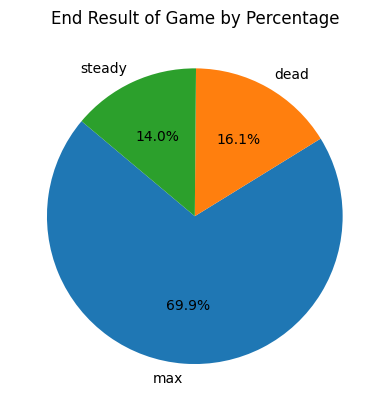

In [105]:
plt.pie(end_state_count["count"], labels=end_state_count["term_reason"], autopct='%1.1f%%', startangle=140)
plt.title("End Result of Game by Percentage")

In [157]:
runs_with_multiple_gens = sample_output.groupby('run').filter(lambda x: x['gen'].nunique() > 1)
sampled_runs = runs_with_multiple_gens["id"].sample(6)

In [158]:
sampled_runs

147281    8-0.45-10000
90396      10-0.3-4900
22820       7-0.25-900
1788        10-0.3-100
127679      2-0.4-8100
70212       3-0.2-3600
Name: id, dtype: object

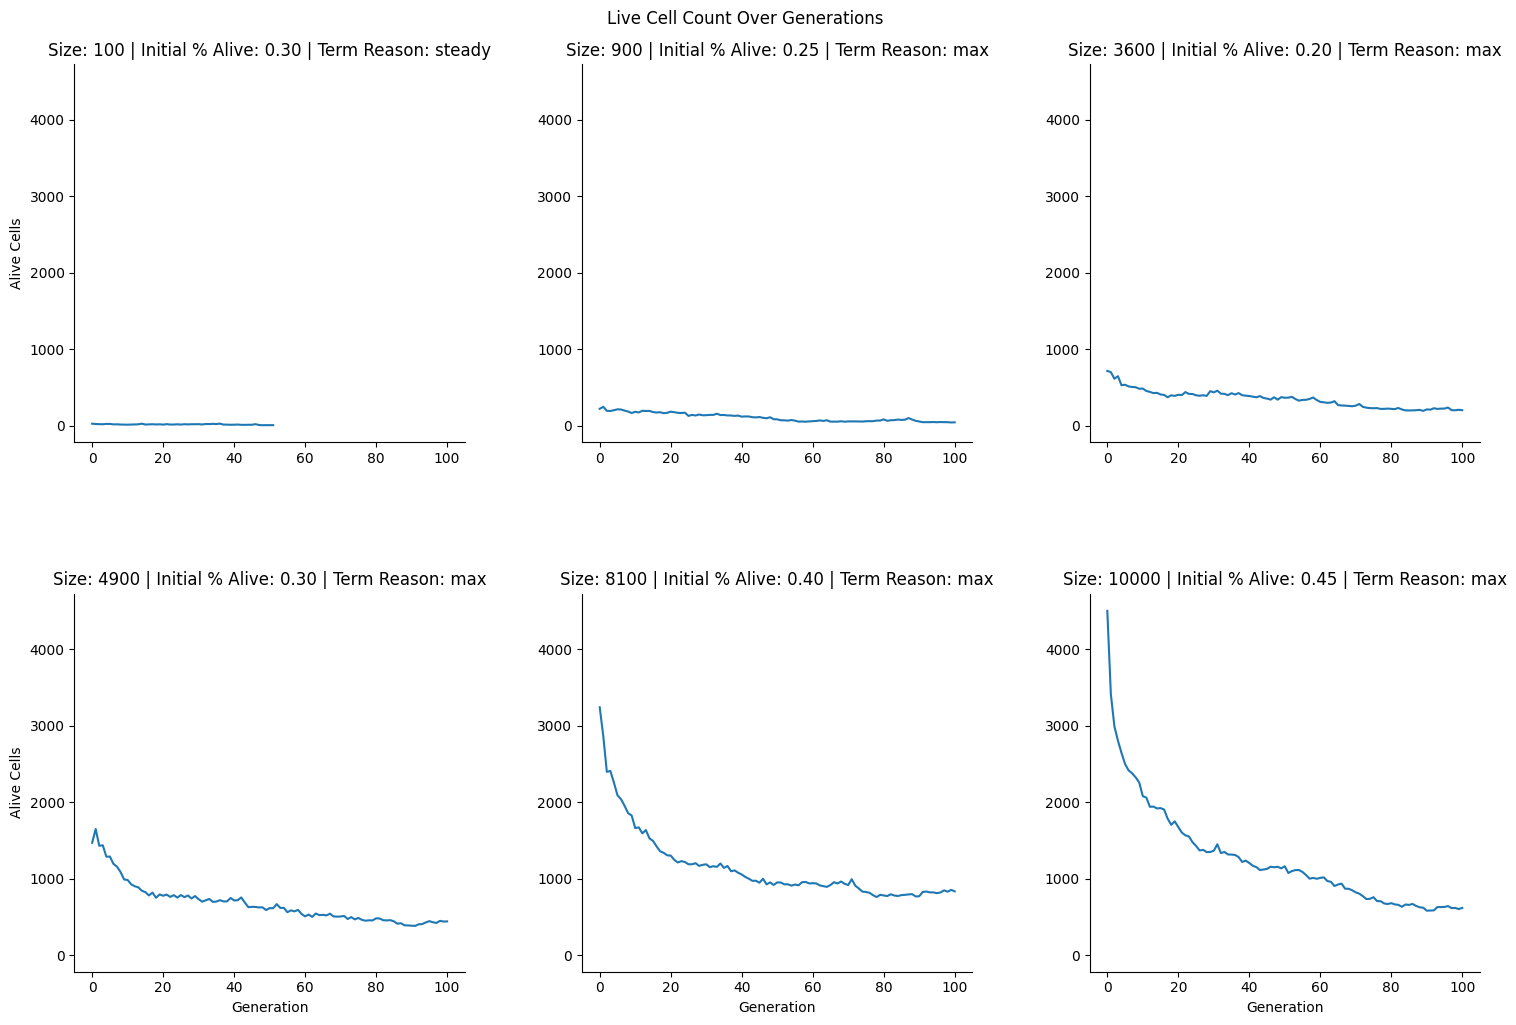

In [176]:
sample_df = sample_output[sample_output["id"].isin(sampled_runs)]
sample_df = sample_df.copy()
sample_df[" "] = sample_df.apply(
    lambda row: f"Size: {row['matrix_size']} | Initial % Alive: {row['initial_percent_alive']:.2f} | Term Reason: {row["term_reason"]}", axis=1
)


g = sns.relplot(data=sample_df,x='gen',y='alive_cells',kind='line',col=' ',    col_wrap=3, markers="O"
)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
g.set_axis_labels("Generation", "Alive Cells")
g.fig.suptitle("Live Cell Count Over Generations", y=1.02)
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True, labelleft=True) 
    ax.set_title(ax.get_title().replace('=', '').strip())

plt.show()

In [171]:
sample_output.pivot_table(
    index='matrix_size',        # Rows (e.g., matrix sizes)
    columns='initial_percent_alive',  # Columns (e.g., starting percentage of alive cells)
    values='alive_cells',       # Values (e.g., alive cells)
    aggfunc='mean'              # Aggregating by mean
)

initial_percent_alive,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
matrix_size,,,,,,,,,,,,,,,,,,,
100,2.500000,4.648649,7.604462,14.647959,13.121032,18.931507,15.017717,18.121835,13.548327,19.558824,14.897674,15.729478,15.387500,17.626168,17.449612,17.588710,24.790698,28.315789,31.342857
400,3.741525,17.352018,21.875740,42.176877,39.985075,55.539896,49.854185,53.522608,51.252495,46.972710,48.168317,44.998705,35.465347,24.024209,21.081023,59.652174,27.974522,95.418605,124.823529
900,5.103448,33.107042,68.529253,78.017625,97.934293,111.719172,105.306931,110.014401,117.075298,93.503150,90.307831,91.729973,67.702439,51.435268,30.050847,34.087912,138.656250,250.972222,278.764706
1600,11.066406,67.906391,126.748875,173.099910,200.298830,196.274527,201.641764,214.665167,199.441044,199.630963,186.245725,166.712871,137.206121,75.542754,48.609677,49.785908,232.582090,329.102041,493.882353
2500,18.520370,78.887489,185.586859,266.672367,306.983798,314.877588,335.826283,332.812781,317.987399,316.846085,292.309631,240.522052,167.273627,113.840684,72.353632,73.353887,98.938462,543.847826,771.088235
3600,22.960916,175.892889,328.586859,370.008101,458.541854,479.868587,498.197120,491.330333,493.509451,455.731773,405.495950,370.683168,272.470747,189.039604,78.770833,56.905530,461.320000,855.000000,1048.083333
4900,26.114130,188.792079,420.487849,539.971197,618.068407,648.082808,659.140414,685.777678,652.855086,629.339334,581.053105,508.223222,351.864986,242.389739,122.090909,92.850000,112.013015,829.864407,1509.470588
6400,42.614224,261.035104,556.557156,720.503150,805.152115,895.680468,893.495950,879.443744,866.013501,820.375338,787.924392,643.344734,489.772277,315.684968,166.670567,102.743875,176.671271,1064.900000,1861.361111
8100,52.818982,320.254725,679.316832,921.637264,1010.894689,1093.256526,1111.293429,1157.305131,1150.861386,1082.033303,985.439244,840.660666,608.627363,390.640864,172.810081,106.360784,298.146067,1171.608696,2493.000000


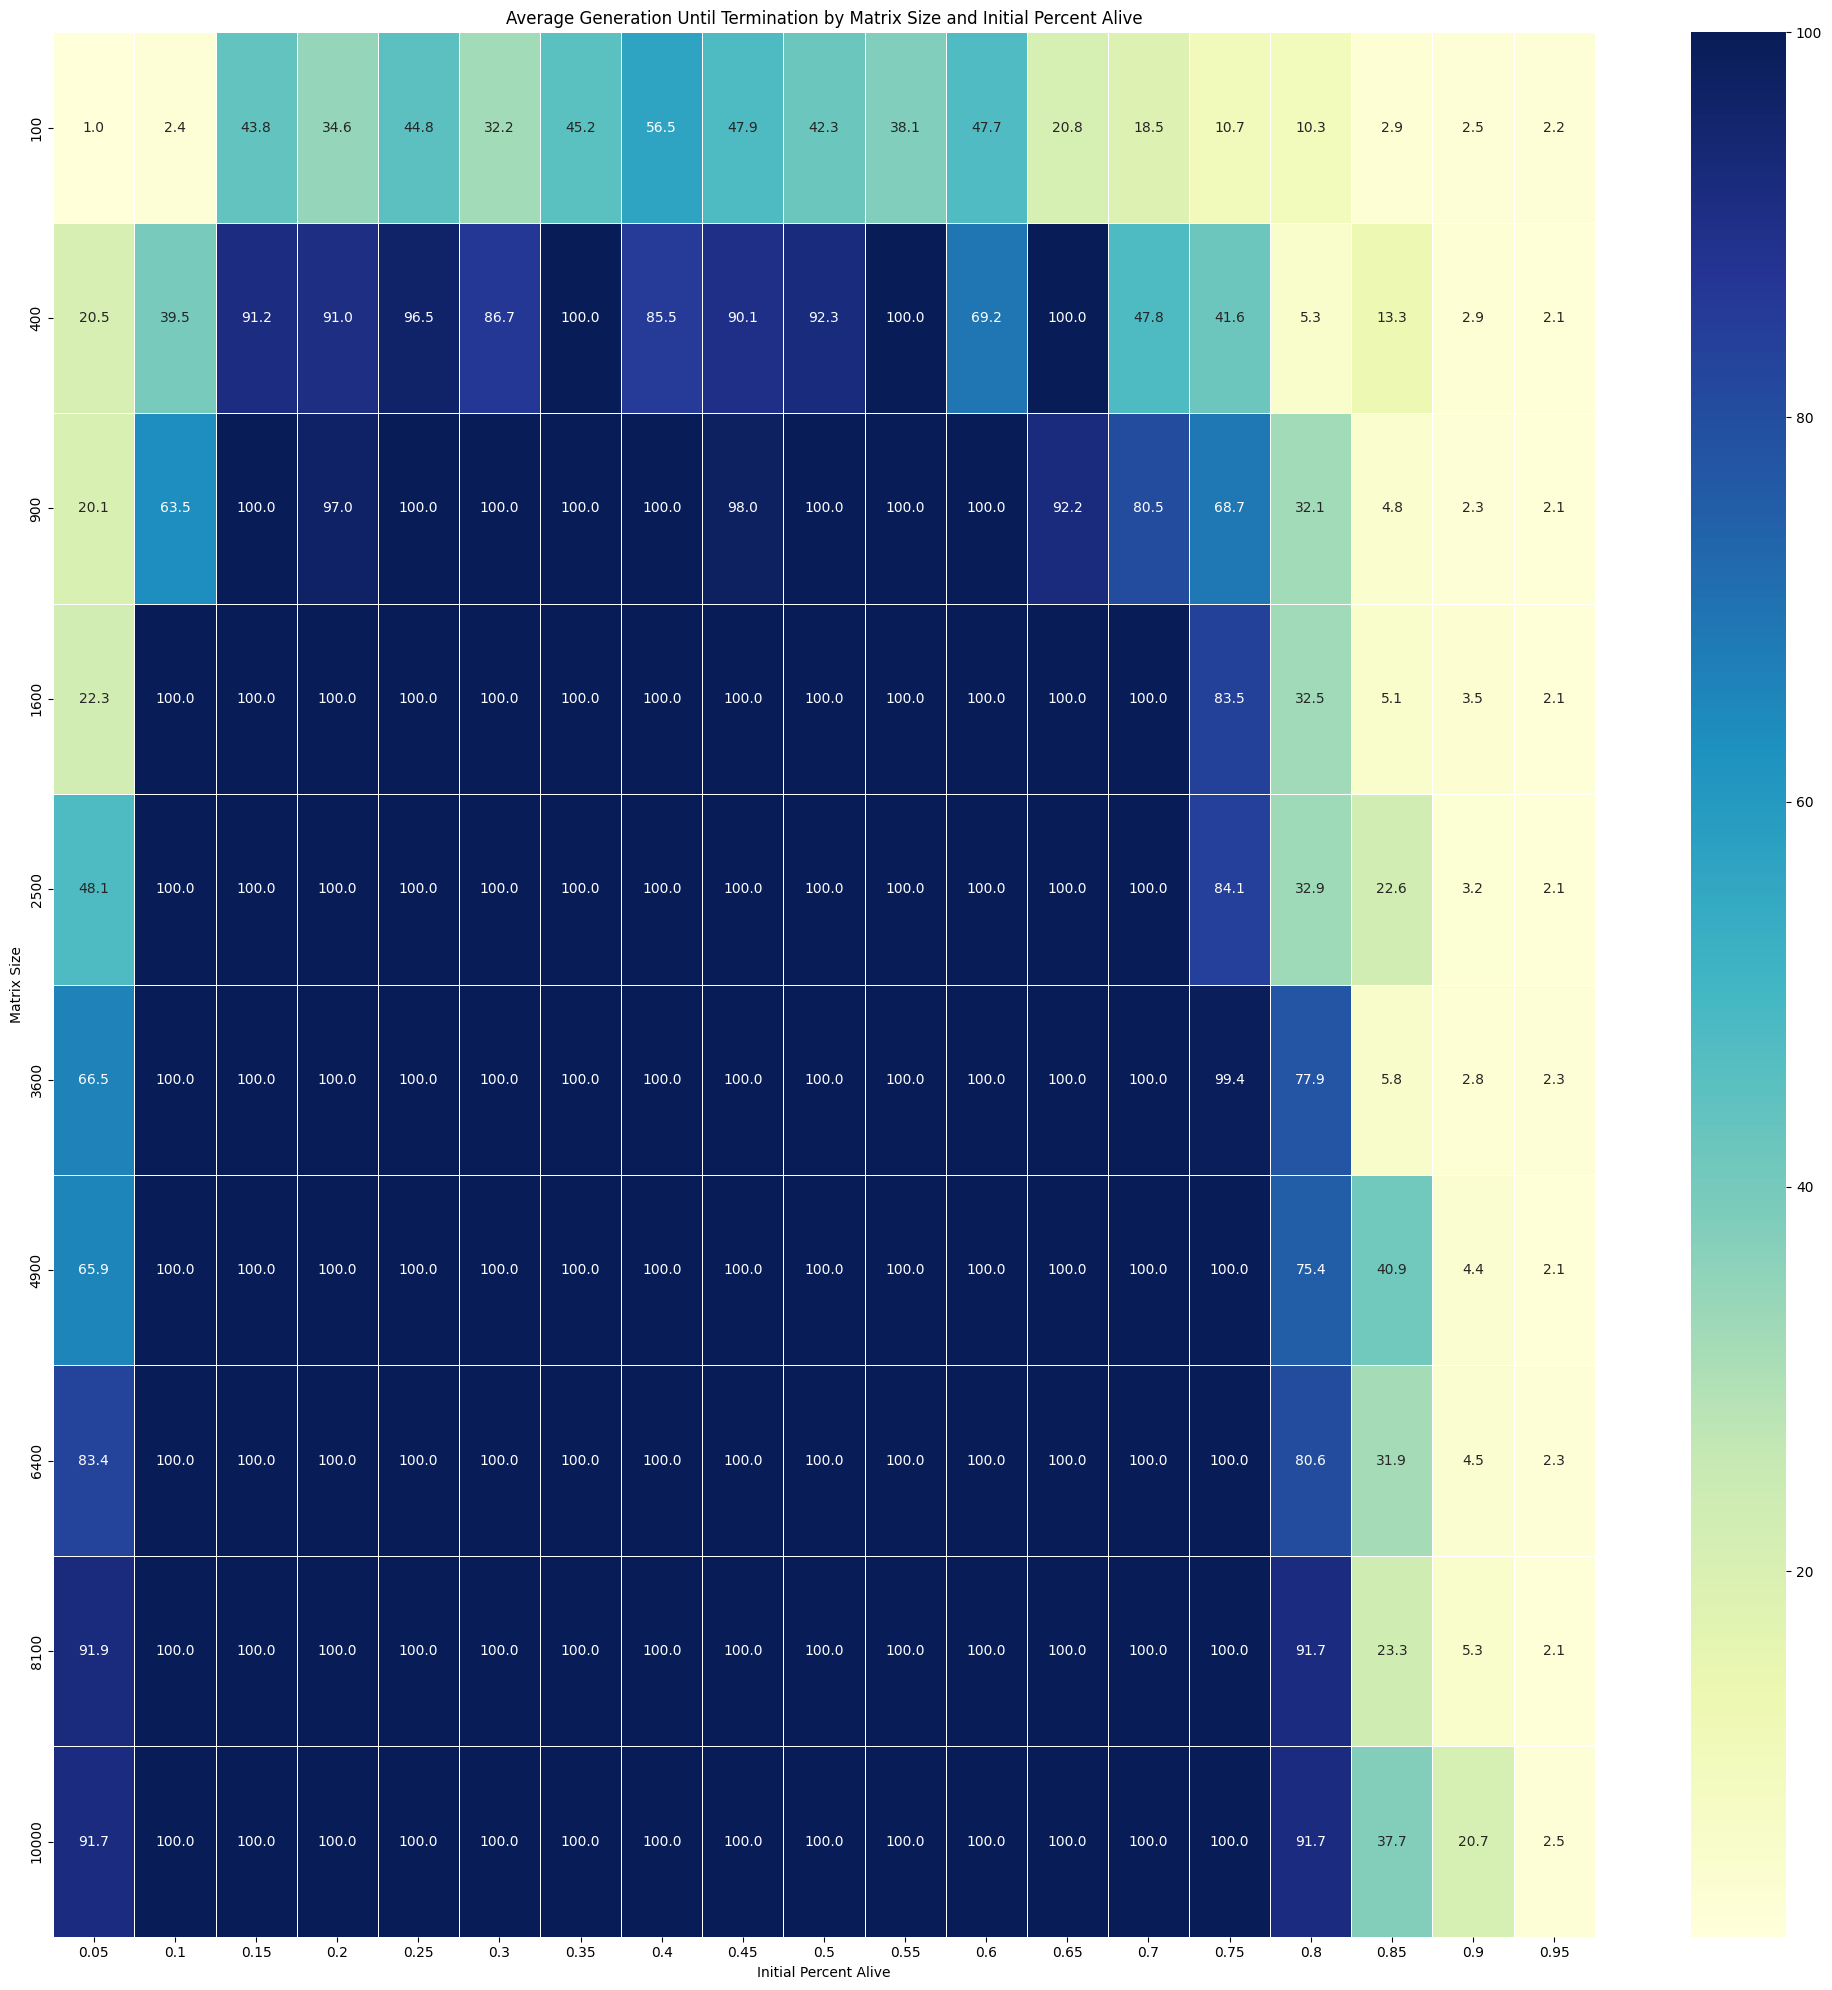

In [175]:
heatmap_data = sample_output.groupby(["matrix_size","initial_percent_alive","run"],as_index=False)["gen"].max().pivot_table(
    index='matrix_size',        # Rows (e.g., matrix sizes)
    columns='initial_percent_alive',  # Columns (e.g., starting percentage of alive cells)
    values='gen',       # Values (e.g., alive cells)
    aggfunc='mean'              # Aggregating by mean
)

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)

plt.title("Average Generation Until Termination by Matrix Size and Initial Percent Alive")
plt.xlabel("Initial Percent Alive")
plt.ylabel("Matrix Size")
plt.tight_layout()
plt.show()

In [172]:
sample_grouped

,matrix_size,initial_percent_alive,run,gen
0,100,0.05,0,1
1,100,0.05,1,1
2,100,0.05,2,1
3,100,0.05,3,1
4,100,0.05,4,1
...,...,...,...,...
2085,10000,0.95,6,2
2086,10000,0.95,7,4
2087,10000,0.95,8,2
2088,10000,0.95,9,2


In [72]:
sample_grouped= sample_output.groupby(["matrix_size","initial_percent_alive","run"],as_index=False)["gen"].max()

In [84]:
sample_grouped_stats = sample_grouped.groupby(["matrix_size", "initial_percent_alive"], as_index=False).agg(
    gen_mean=("gen", "mean"),
    gen_std=("gen", "std"),
    n=("gen", "count")
)

sample_grouped_stats["gen_standard_error"] = sample_grouped_stats["gen_std"] / np.sqrt(sample_grouped_stats["n"])
sample_grouped_stats["ci_95"] = 1.96 * sample_grouped_stats["gen_standard_error"]
sample_grouped_stats["matrix_size"] = sample_grouped_stats["matrix_size"].astype(str)

sample_grouped_stats.sort_values(["gen_mean","gen_std"],ascending=False)

,matrix_size,initial_percent_alive,gen_mean,gen_std,n,gen_standard_error,ci_95
25,400,0.35,100.000000,0.000000,11,0.000000,0.000000
29,400,0.55,100.000000,0.000000,11,0.000000,0.000000
31,400,0.65,100.000000,0.000000,11,0.000000,0.000000
40,900,0.15,100.000000,0.000000,11,0.000000,0.000000
42,900,0.25,100.000000,0.000000,11,0.000000,0.000000
...,...,...,...,...,...,...,...
75,1600,0.95,2.090909,0.301511,11,0.090909,0.178182
132,4900,0.95,2.090909,0.301511,11,0.090909,0.178182
37,400,0.95,2.090909,0.301511,11,0.090909,0.178182
56,900,0.95,2.090909,0.301511,11,0.090909,0.178182


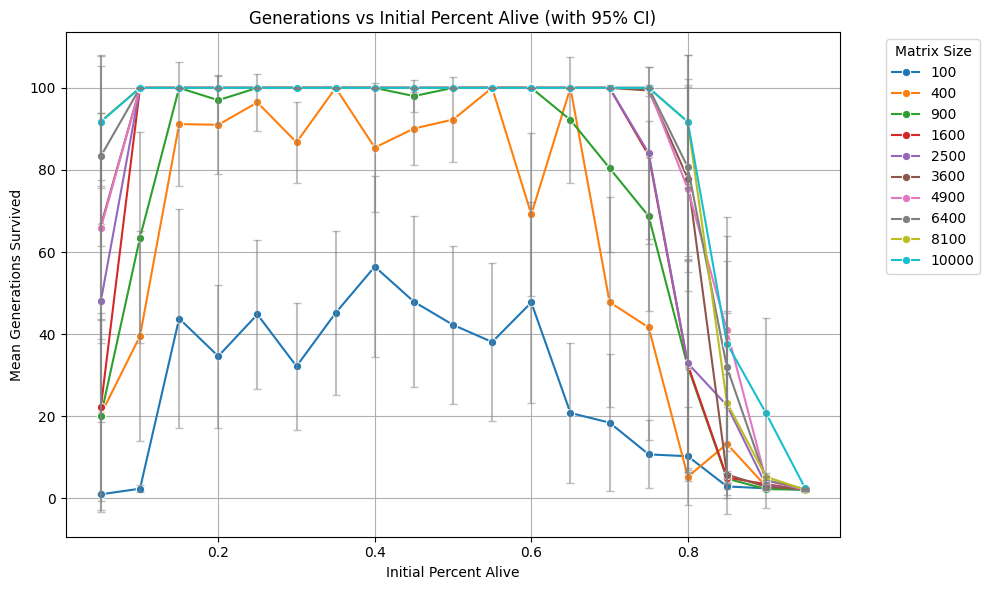

In [85]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=sample_grouped_stats,x="initial_percent_alive",y="gen_mean",hue="matrix_size",marker="o",err_style=None
)

for _, row in sample_grouped_stats.iterrows():
    plt.errorbar(x=row["initial_percent_alive"],y=row["gen_mean"],yerr=row["ci_95"],fmt='none',capsize=3,color='gray',alpha=0.5)

plt.title("Generations vs Initial Percent Alive (with 95% CI)")
plt.xlabel("Initial Percent Alive")
plt.ylabel("Mean Generations Survived")
plt.legend(title="Matrix Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
anova_results = anova_analysis(sample_output)
import math

In [5]:
sample_output

,alive_cells,gen,run,initial_percent_alive,matrix_size,term_reason,last_gen
0,5,0,0,0.05,100,dead,1
1,0,1,0,0.05,100,dead,1
2,5,0,1,0.05,100,dead,1
3,0,1,1,0.05,100,dead,1
4,5,0,2,0.05,100,dead,1
...,...,...,...,...,...,...,...
155947,12,1,9,0.95,10000,dead,2
155948,0,2,9,0.95,10000,dead,2
155949,9500,0,10,0.95,10000,dead,2
155950,15,1,10,0.95,10000,dead,2


In [157]:
sample_output_df = pd.merge(sample_generation_df,sample_run_df,on=["run","initial_percent_alive","matrix_size"],how="left")

In [209]:
sample_generation_df

,alive_cells,gen,run,initial_percent_alive,matrix_size
0,5,0,0,0.05,100
1,0,1,0,0.05,100
2,5,0,1,0.05,100
3,0,1,1,0.05,100
4,5,0,2,0.05,100
...,...,...,...,...,...
155375,12,1,9,0.95,10000
155376,0,2,9,0.95,10000
155377,9500,0,10,0.95,10000
155378,15,1,10,0.95,10000


In [159]:
sample_output_df.to_csv(r"C\:\\Users\\Will\\Documents\\school_data\\gol_new.csv",index= False)

In [ ]:
sample_output_df.to_csv(r"C\:\\Users\\Will\\Documents\\school_data\\gol.csv",index= False)

In [224]:
result_dict = defaultdict(lambda: defaultdict(list))

In [225]:
sample_amount_dict = {100: 71,
 400: 45,
 900: 45,
 1600: 45,
 2500: 45,
 3600: 45,
 4900: 45,
 6400: 45,
 8100: 45,
 10000: 45}

In [226]:
for m in range(10,110,10):
    for i in np.arange(.05, 1, 0.05):
        p = round(i, 2)  
        for x in range(sample_amount_dict[m*m]):  
            matrix = generate_rand_matrix(m, m, p)
            run_game(matrix, x, m*m, result_dict, p)

output_dict = {k:pd.DataFrame(v) for k,v in result_dict.items()}
generation_df = output_dict["gen_dict"]
run_df = output_dict["run_dict"]

In [227]:
output_dict = {k:pd.DataFrame(v) for k,v in result_dict.items()}
generation_df = output_dict["gen_dict"]
run_df = output_dict["run_dict"]

In [239]:
output_df = pd.merge(generation_df,run_df,on=["run","initial_percent_alive","matrix_size"],how="left")

In [240]:
run_df["test"] = run_df[["run","initial_percent_alive","matrix_size"]].astype(str).agg("-".join,axis=1)
sample_run_df["test"]=  sample_run_df[["run","initial_percent_alive","matrix_size"]].astype(str).agg("-".join,axis=1)

In [241]:
sample_run_df["test"].duplicated().sum()


np.int64(0)

In [242]:
generation_df.shape[0]

647679

In [243]:
output_df

,alive_cells,gen,run,initial_percent_alive,matrix_size,term_reason,last_gen,test
0,5,0,0,0.05,100,dead,1,0-0.05-100
1,0,1,0,0.05,100,dead,1,0-0.05-100
2,5,0,1,0.05,100,dead,1,1-0.05-100
3,0,1,1,0.05,100,dead,1,1-0.05-100
4,5,0,2,0.05,100,dead,1,2-0.05-100
...,...,...,...,...,...,...,...,...
647674,2,2,43,0.95,10000,dead,3,43-0.95-10000
647675,0,3,43,0.95,10000,dead,3,43-0.95-10000
647676,9500,0,44,0.95,10000,dead,2,44-0.95-10000
647677,14,1,44,0.95,10000,dead,2,44-0.95-10000


In [244]:
output_df.to_csv(r"C\:\\Users\\Will\\Documents\\school_data\\gol_final_final.csv",index= False)